# Phân tích một âm tiết tiếng Việt (từ đơn) thành 3 thành phần: phụ âm đầu, vần và thanh điệu

In [1]:
vietnamese_vowel = [
    "a","à","á","ả","ã","ạ",
    "ă","ằ","ắ","ẳ","ẵ","ặ",
    "â","ầ","ấ","ẩ","ẫ","ậ",
    "e","è","é","ẻ","ẽ","ẹ",
    "ê","ề","ế","ể","ễ","ệ",
    "i","ì","í","ỉ","ĩ","ị",
    "o","ò","ó","ỏ","õ","ọ",
    "ô","ồ","ố","ổ","ỗ","ộ",
    "ơ","ờ","ớ","ở","ỡ","ợ",
    "u","ù","ú","ủ","ũ","ụ",
    "ư","ừ","ứ","ử","ữ","ự",
    "y","ỳ","ý","ỷ","ỹ","ỵ"
]

In [2]:
def first_vowel_idx(word):
    for i,c in enumerate(word):
        if c in vietnamese_vowel:
            return i

In [3]:
first_vowel_idx("con")

1

In [4]:
first_vowel_idx("yêu")

0

In [5]:
def get_initial_consonant_rhyme(word):
    idx = first_vowel_idx(word)
    if idx == 0:
        return ("", word)
    return word[:idx], word[idx:]

In [6]:
get_initial_consonant_rhyme("mưa")

('m', 'ưa')

In [7]:
get_initial_consonant_rhyme("buồn")

('b', 'uồn')

In [8]:
import ctnx
def perfect_rhyme(word1, word2):
    return ctnx.remove_tones(get_initial_consonant_rhyme(word1)[1]) == ctnx.remove_tones(get_initial_consonant_rhyme(word2)[1])

In [9]:
perfect_rhyme("luôn", "buồn")

True

In [10]:
def first_vowel_tone_diacritics(word):
    for c in word:
        if c in vietnamese_vowel and c not in "a ă â e ê o ô ơ u ư y":
            return c

In [11]:
first_vowel_tone_diacritics("buồn")

'ồ'

In [12]:
def get_tone(word):
    c = first_vowel_tone_diacritics(word)
    if c == None:
        return "ngang"
    if c in "à ằ ầ è ề ò ồ ờ ù ừ ỳ":
        return "huyền"
    if c in "á ắ ấ é ế ó ố ớ ú ứ ý":
        return "sắc"
    if c in "ả ẳ ẩ ẻ ể ỏ ổ ở ủ ử ỷ":
        return "hỏi"
    if c in "ã ẵ ẫ ẽ ễ õ ỗ ỡ ũ ữ ỹ":
        return "ngã"
    if c in "ạ ặ ậ ẹ ệ ọ ộ ợ ụ ự ỵ":
        return "nặng"
    
    return "ngang"

In [13]:
get_tone("buồn")

'huyền'

In [14]:
get_tone("ngủ")

'hỏi'

In [15]:
get_tone("mệt")

'nặng'

In [16]:
get_tone("quá")

'sắc'

In [17]:
get_tone("lãng")

'ngã'

In [18]:
get_tone("phí")

'ngang'

In [73]:
import random
def word2note(word):
    tone = get_tone(word)
    if tone == "ngang":
        return random.choice(["c'", "e'"])
    if tone == "huyền":
        return random.choice(["g", "b"])
    if tone == "sắc":
        return random.choice(["e'", "g'"])
    if tone == "hỏi":
        return random.choice(["e", "g"])
    if tone == "ngã":
        return random.choice(["g'", "b'"])
    if tone == "nặng":
        return random.choice(["c", "e"])

In [74]:
txt = """trăm năm trong cõi người ta, 
chữ tài chữ mệnh khéo là ghét nhau.
trải qua một cuộc bể dâu,
những điều trông thấy mà đau đớn lòng.
lạ gì bỉ sắc tư phong,
trời xanh quen thói má hồng đánh ghen.
cảo thơm lần giở trước đèn,
phong tình cổ lục còn truyền sử xanh.
"""

In [75]:
words = txt.split()

In [76]:
pitches = [word2note(w) for w in words]
pitches

["e'",
 "c'",
 "e'",
 "b'",
 'g',
 "c'",
 "b'",
 'b',
 "g'",
 'e',
 "e'",
 'b',
 "g'",
 "c'",
 'e',
 "e'",
 'c',
 'e',
 'e',
 "e'",
 "g'",
 "e'",
 "e'",
 "g'",
 'b',
 "e'",
 "g'",
 'b',
 'e',
 "c'",
 "e'",
 "e'",
 "c'",
 "c'",
 'g',
 "c'",
 "e'",
 "g'",
 "e'",
 'b',
 "g'",
 "e'",
 'g',
 "c'",
 'b',
 "e'",
 "g'",
 'g',
 "c'",
 "e'",
 'g',
 'e',
 'b',
 'b',
 'g',
 "e'"]

In [77]:
def flatten(listlist):
    return [item for row in listlist for item in row]

In [78]:
from underthesea import word_tokenize

In [79]:
durations = flatten([ [ 4 * len(w.split())]* len(w.split()) for w in word_tokenize(txt)])
durations

[4,
 4,
 4,
 4,
 8,
 8,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 8,
 8,
 4,
 4,
 4,
 4,
 4,
 4,
 8,
 8,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 8,
 8,
 8,
 8,
 8,
 8,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 8,
 8,
 8,
 8,
 4,
 4,
 8,
 8,
 4]

In [80]:
notes = []
for i, p in enumerate(pitches):
    d = durations[i]
    w = words[i]
    notes.append(f"{p}{d}_{w}")
notes

["e'4_trăm",
 "c'4_năm",
 "e'4_trong",
 "b'4_cõi",
 'g8_người',
 "c'8_ta,",
 "b'4_chữ",
 'b4_tài',
 "g'4_chữ",
 'e4_mệnh',
 "e'4_khéo",
 'b4_là',
 "g'4_ghét",
 "c'4_nhau.",
 'e4_trải',
 "e'4_qua",
 'c4_một',
 'e4_cuộc',
 'e4_bể',
 "e'4_dâu,",
 "g'8_những",
 "e'8_điều",
 "e'4_trông",
 "g'4_thấy",
 'b4_mà',
 "e'4_đau",
 "g'4_đớn",
 'b4_lòng.',
 'e8_lạ',
 "c'8_gì",
 "e'4_bỉ",
 "e'4_sắc",
 "c'4_tư",
 "c'4_phong,",
 'g4_trời',
 "c'4_xanh",
 "e'4_quen",
 "g'4_thói",
 "e'4_má",
 'b4_hồng',
 "g'4_đánh",
 "e'8_ghen.",
 'g8_cảo',
 "c'8_thơm",
 'b8_lần',
 "e'8_giở",
 "g'8_trước",
 'g4_đèn,',
 "c'4_phong",
 "e'4_tình",
 'g4_cổ',
 'e4_lục',
 'b4_còn',
 'b4_truyền',
 'g4_sử',
 "e'8_xanh."]

In [81]:
melody = " ".join(notes)

In [82]:
from music21 import *

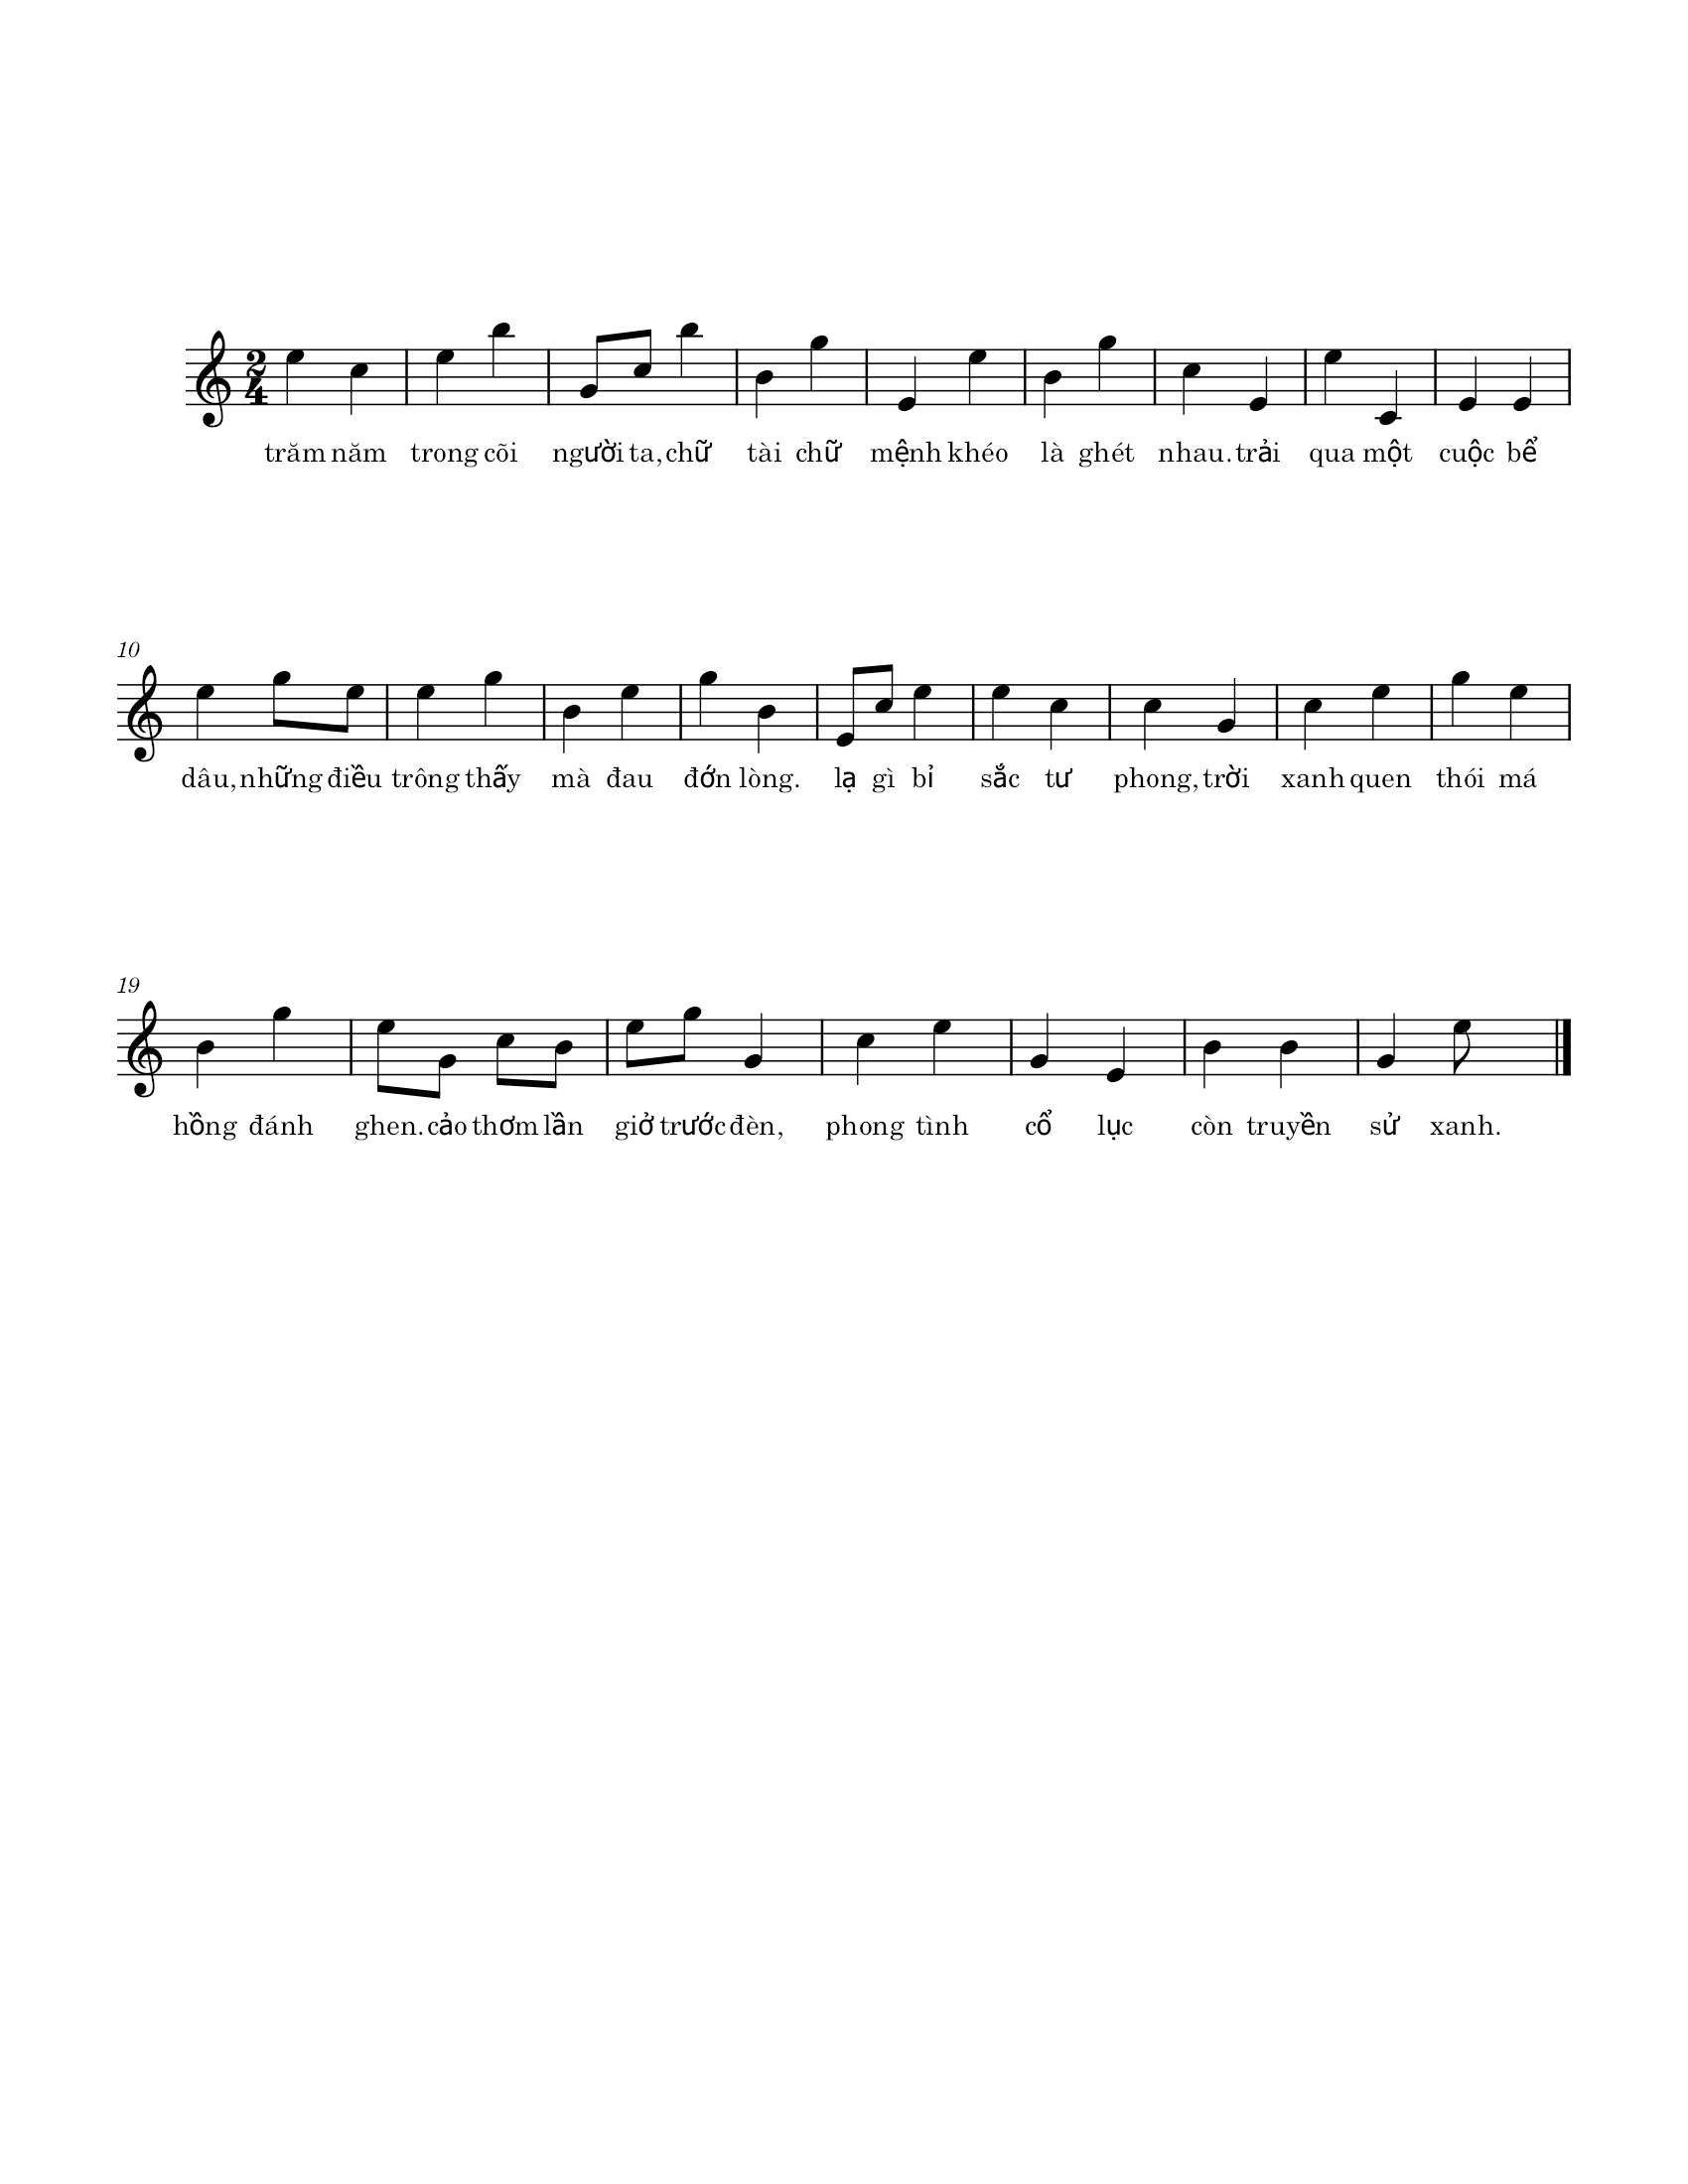

In [83]:
littleMelody = converter.parse(f"tinynotation: 2/4 {melody}")
littleMelody.show()

In [84]:
littleMelody.show('midi')